In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [15]:
kaggle_df = pd.read_csv('input_data/kaggle_filtered_courses.csv')

# Exploratory Data Analysis

- Given that we are working with a lot of text data, it makes the most sense to work with text categorization.

- Furthermore, since we care about the categories of the courses for now we should aim to look at how they differ and recommend different approaches for the Data Scientist to implement on certain models

In [22]:
kaggle_df.shape

(464, 7)

In [18]:
kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                464 non-null    object
 1   University          464 non-null    object
 2   Difficulty Level    464 non-null    object
 3   Link                464 non-null    object
 4   About               464 non-null    object
 5   Course Description  464 non-null    object
 6   Category            464 non-null    object
dtypes: object(7)
memory usage: 25.5+ KB


In [21]:
kaggle_df.describe()

,Name,University,Difficulty Level,Link,About,Course Description,Category
count,464,464,464,464,464,464,464
unique,462,87,3,464,445,462,6
top,Introduction to Marketing,Harvard University,Beginner,https://www.edx.org/course/mechanics-rotationa...,This course is part of a MicroMasters® Program,"About the Database Series of Courses""Databases...",Business
freq,2,32,255,1,14,3,182


### Duplicates

`Initial Intent:`
- Seems there are some duplicates in the dataset

`Conclusion:`
- They are both from a different University that offers it the couse

`Interpreation:`
- Should not impact the models in the future too much so it should be fine 

In [20]:
duplicates = kaggle_df[kaggle_df['Name'] == 'Introduction to Marketing']
duplicates

,Name,University,Difficulty Level,Link,About,Course Description,Category
82,Introduction to Marketing,University of British Columbia,Beginner,https://www.edx.org/course/introduction-to-mar...,"Learn the fundamentals to marketing, including...",Marketing is a crucial function in all busines...,Marketing
281,Introduction to Marketing,The University of Edinburgh,Beginner,https://www.edx.org/course/introduction-to-mar...,An introduction to the role of marketing in a ...,Do you want to learn how successful businesses...,Marketing


### Dropped values

`Initial Intent:`
- Checking for null values

`Conclusion:`    
- There are none

`Interpretation:`
- Nothing to do, all good to go ahead

In [25]:
kaggle_df.isnull().sum()

Name                  0
University            0
Difficulty Level      0
Link                  0
About                 0
Course Description    0
Category              0
dtype: int64

### Checking for Class Balance (Over/Underrepresented Values) Within the Dataset

`Initial Intent:`
- I believe there must be an overrepresentation in the university and course category

`Conclusion:`
- As expected there is an overrepresentation in the universities that offer courses that we have selected in the kaggle dataset.

There is a total of `464` courses offered in the dataset<br><br>
The most common universities offer `120` courses<br>
This is equivalent to `25.86%` of the total courses offered

- Similarly there is an overrepresentation on the Course Category of what the dataset is using with Business and Computer Science being the two biggest categories by a large margin

There is a total of `464` courses offered in the dataset
Business and CompSci offer `314` courses together
This is equivalent to `67.67%` of the total courses offered


`Interpretation:`
- Given the stats presented, there may be a slight overrepresentation of the university of the courses within the kaggle dataset. However, a problem to consider that the two largest Course Categories (Business and Computer Science) make up the vast majority of the data offered, as such, it is important to collect more courses that can be provided to the users, and as such be tailored to their experiences further.

In [29]:
print(kaggle_df.nunique())

Name                  462
University             87
Difficulty Level        3
Link                  464
About                 445
Course Description    462
Category                6
dtype: int64


### Checking University 

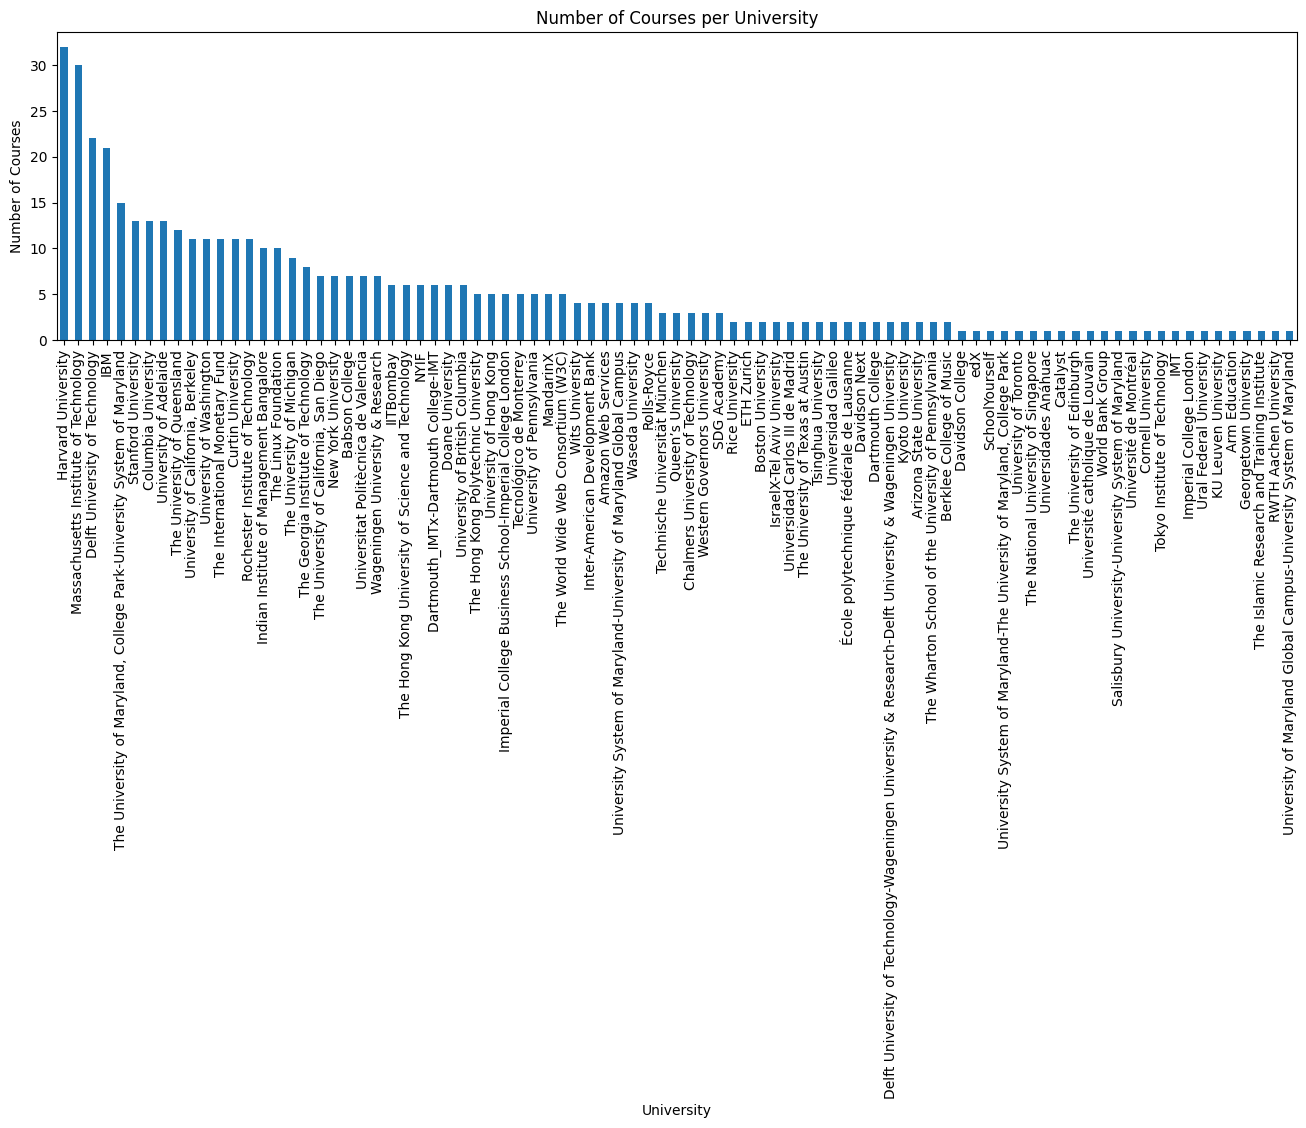

In [42]:
# I want to print the unique values of the columns to see there is any overrepresented values in the university column
# print(kaggle_df['University'].value_counts())

# Plotting the unique values of the University column
plt.figure(figsize=(16, 4))
kaggle_df['University'].value_counts().plot(kind='bar')
plt.xlabel('University')
plt.ylabel('Number of Courses')
plt.title('Number of Courses per University')
plt.xticks(rotation=90)
plt.show()


In [60]:
total_offered = kaggle_df['University'].value_counts().sum()
top5_uni_offered = kaggle_df['University'].value_counts().head(5).sum()


print(f'There is a total of {total_offered} courses offered in the dataset')
print(f'The most common universities offer {top5_uni_offered} courses')
print(f'This is equivalent to {top5_uni_offered/total_offered * 100:0.2f}% of the total courses offered')


There is a total of 464 courses offered in the dataset
The most common universities offer 120 courses
This is equivalent to 25.86% of the total courses offered


### Checking Course Category

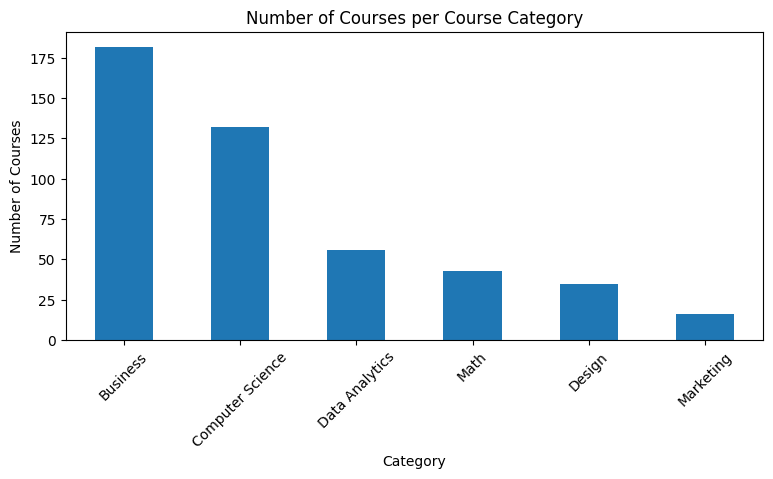

In [63]:
# I want to print the unique values of the columns to see there is any overrepresented values in the university column
# print(kaggle_df['University'].value_counts())

# Plotting the unique values of the University column
plt.figure(figsize=(9, 4))
kaggle_df['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Number of Courses')
plt.title('Number of Courses per Course Category')
plt.xticks(rotation=45)
plt.show()


In [64]:
total_offered = kaggle_df['Category'].value_counts().sum()
top5_uni_offered = kaggle_df['Category'].value_counts().head(2).sum()


print(f'There is a total of {total_offered} courses offered in the dataset')
print(f'The most common universities offer {top5_uni_offered} courses')
print(f'This is equivalent to {top5_uni_offered/total_offered * 100:0.2f}% of the total courses offered')


There is a total of 464 courses offered in the dataset
The most common universities offer 314 courses
This is equivalent to 67.67% of the total courses offered


### Conclusions: Kaggle Dataset

- Given the small amount of data provided by Kaggle Dataset, it is important to collect more and join it together for continious model development and improvement, such that the recommendation system is able to provide information that is beneficial to the users 